In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#📖 Read Data

In [ ]:
data = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/ecommerce_banner_promo.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [ ]:
data.shape

(1000, 10)

#📒 Column Descriptions:

---


1. **Daily Time Spent on Site**: The amount of time (in minutes) the user spends on the site daily.  

2. **Age**: The user's age (in years).  

3. **Area Income**: The average income in the user's local area.

4. **Daily Internet Usage**: The average amount of time (in minutes) the user spends on the internet per day.  

5. **Ad Topic Line**: The topic/content of the promotional banner.  

6. **City**: The city from which the user accessed the website.  

7. **Male**: Indicates whether the user is male (1 = Male, 0 = Not male).  

8. **Country**: The country from which the user accessed the website.  

9. **Timestamp**: The time when the user either clicked on the promotional banner or left the website without clicking.

10. **Clicked on Ad**: Indicates whether the user clicked on the promotional banner (0 = No, 1 = Yes).

In [ ]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


###Check Correlation


Korelasi dataset:
                           Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.331513     0.310954   
Age                                      -0.331513  1.000000    -0.182605   
Area Income                               0.310954 -0.182605     1.000000   
Daily Internet Usage                      0.518658 -0.367209     0.337496   
Male                                     -0.018951 -0.021044     0.001322   
Clicked on Ad                            -0.748117  0.492531    -0.476255   

                          Daily Internet Usage      Male  Clicked on Ad  
Daily Time Spent on Site              0.518658 -0.018951      -0.748117  
Age                                  -0.367209 -0.021044       0.492531  
Area Income                           0.337496  0.001322      -0.476255  
Daily Internet Usage                  1.000000  0.028012      -0.786539  
Male                                  0.028012  1.000000      -0.038027

<Axes: >

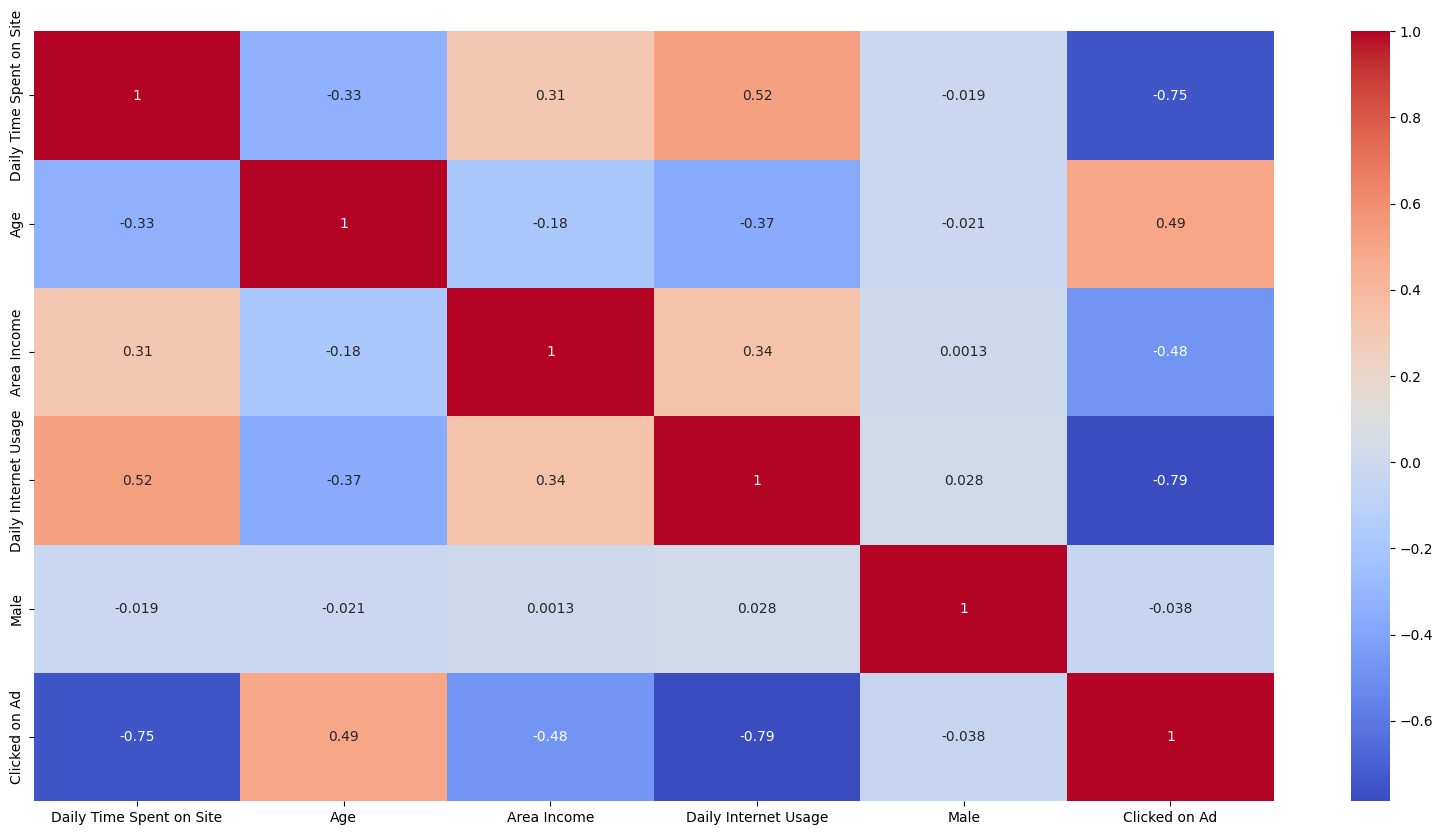

In [ ]:
data_corr = data.select_dtypes(include=["number"]).corr()
print('Korelasi dataset:\n', data_corr)

plt.figure(figsize=(20,10))
sns.heatmap(data_corr, annot = True, cmap='coolwarm')

Based on the correlation analysis, several interesting insights emerge regarding user behavior in clicking ads. The variable Age has a positive correlation of 0.49 with Clicked on Ad, indicating that older users tend to click on ads more frequently. In contrast, Daily Time Spent on Site shows a strong negative correlation of -0.75, meaning that the more time users spend on the site, the less likely they are to click on ads.

A similar pattern is observed with Daily Internet Usage, which has a negative correlation of -0.79, suggesting that users with higher internet usage tend to click on ads less often. Additionally, Area Income shows a negative correlation of -0.48 with ad clicks, implying that users from higher-income areas are less inclined to engage with ads.

Meanwhile, the variable Male (Gender) has a very low correlation of -0.038, indicating that gender does not have a significant influence on ad-clicking behavior.

## Checking the Distribution of Clicked on Ad


Text(0, 0.5, 'count')

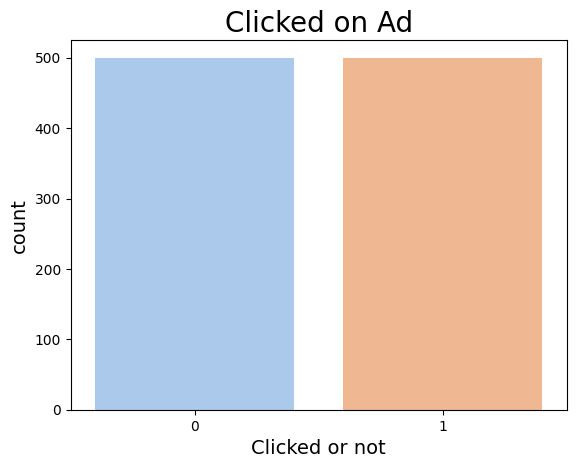

In [ ]:
sns.countplot(x='Clicked on Ad', data=data, hue='Clicked on Ad', palette='pastel', legend= False)
plt.title('Clicked on Ad', fontsize=20)
plt.xlabel('Clicked or not', fontsize=14)
plt.ylabel('count', fontsize=14)

The graph above shows the number of users who clicked on the ad (1) and those who did not (0). It can be seen that the numbers are relatively balanced. This means the data does not suffer from class imbalance, allowing a classification model such as Logistic Regression to be trained without the need for additional data balancing techniques like oversampling or undersampling

##Age Distribution of Website Users

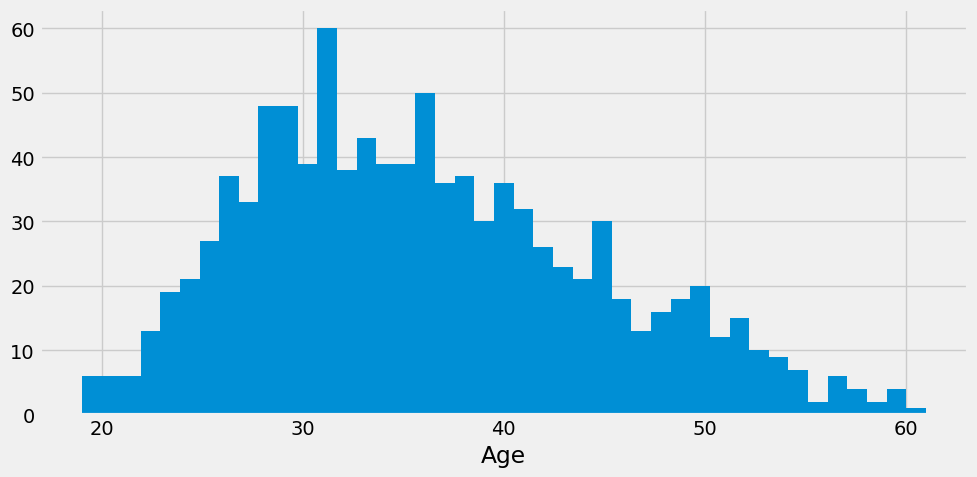

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.hist(data["Age"], bins = data.Age.nunique())
plt.xlabel("Age")
plt.tight_layout()
plt.show()

This histogram shows the distribution of user ages in the dataset. Most users are between 25 and 40 years old, indicating that the platform is primarily used by young to middle-aged adults.

##Feature Relationship Visualization

<Figure size 640x480 with 0 Axes>

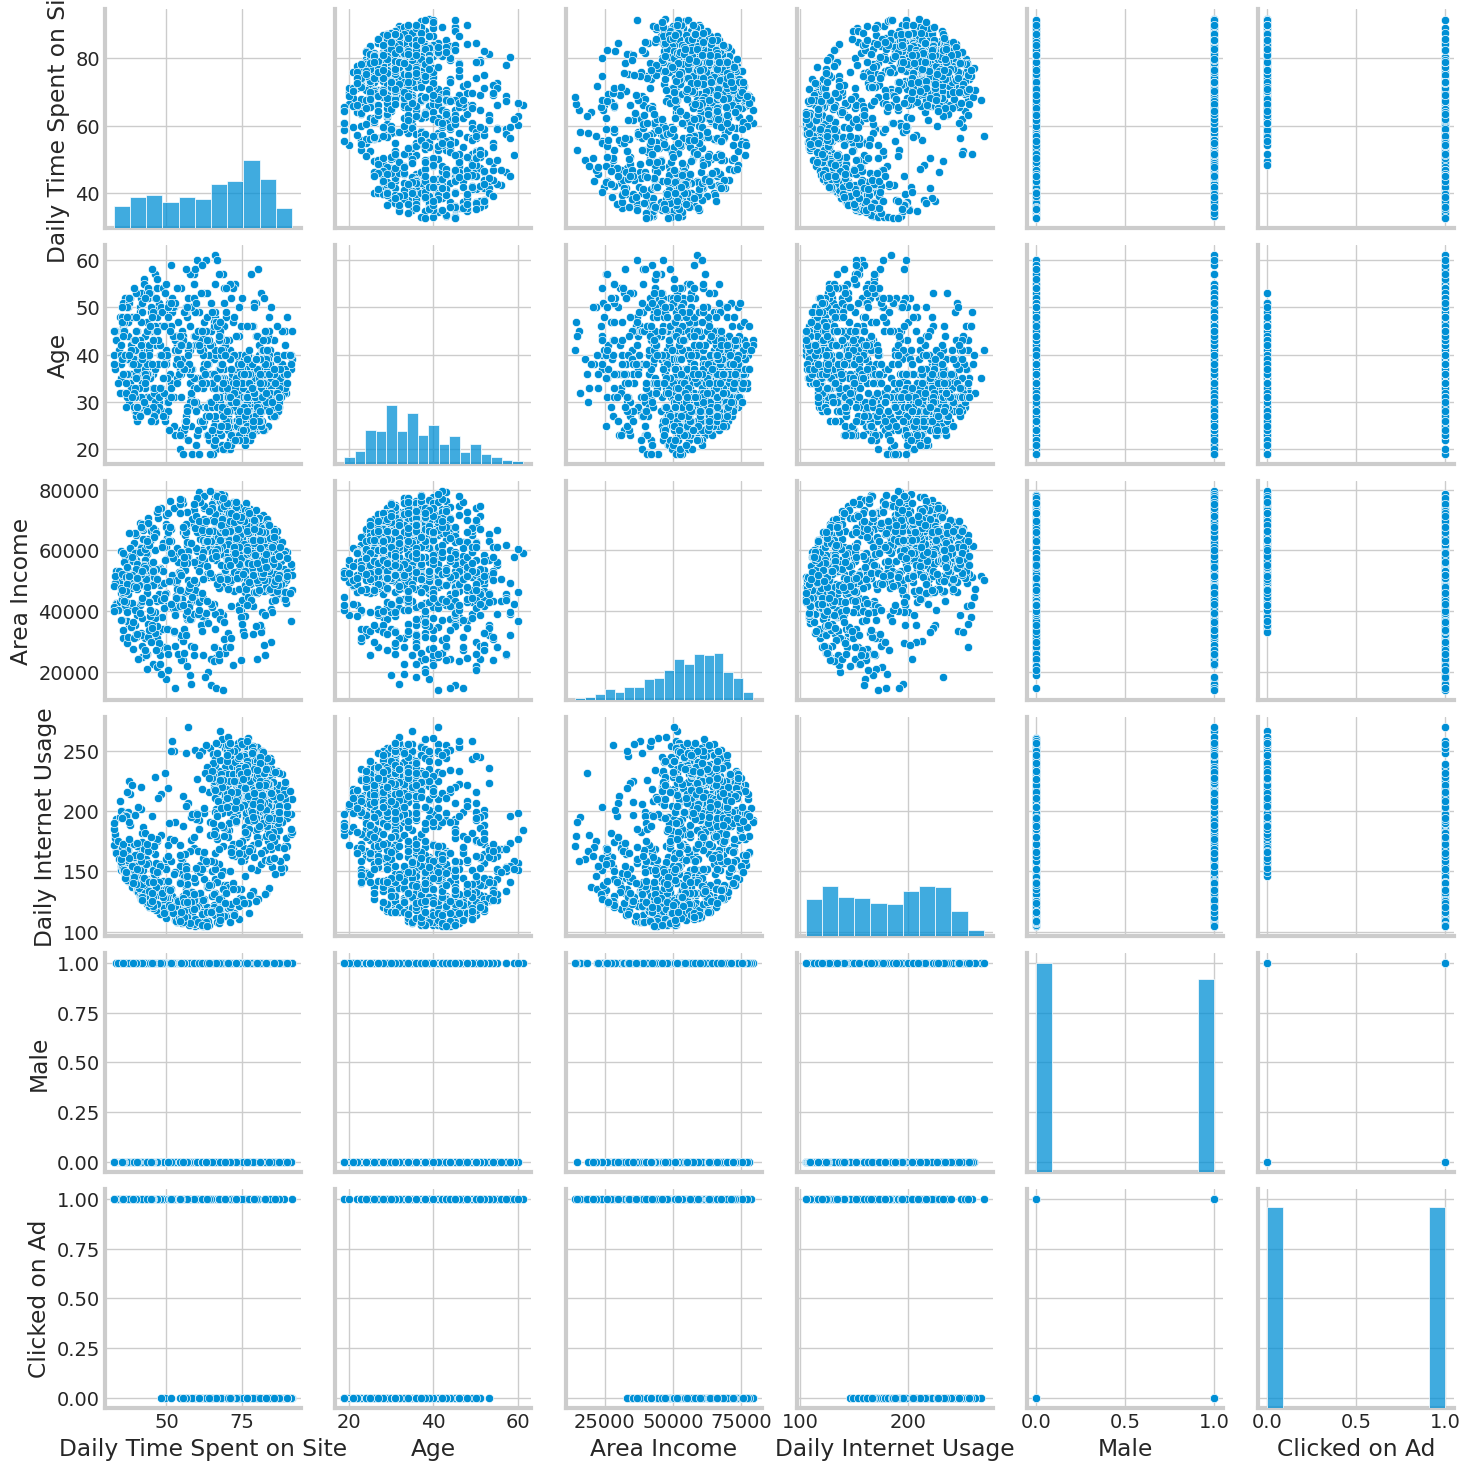

In [ ]:
sns.set_style('whitegrid')
plt.figure()
sns.pairplot(data)
plt.show()

Most of the relationships between features appear to be randomly scattered in circular patterns, indicating weak or no linear correlation. Extreme outliers are not clearly visible in this scatter plot, so additional visualizations such as box plots are needed to confirm the presence of outliers and to better understand the data distribution.


##📌 Feature Selection – Dropping Unnecessary Columns
To simplify the dataset and focus on relevant numerical features, several columns were dropped.

In [ ]:
data.drop(['Ad Topic Line','City','Country','Timestamp'], axis = 1, inplace = True)

The dataset is now clean, contains only numerical features, and is ready for further preprocessing like scaling or model training

##Checking Missing Value


In [ ]:
data.isnull().sum()

,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Male,0
Clicked on Ad,0


Based on the inspection, there are no missing values in the dataset. Therefore, the data is ready to proceed to the next stage of analysis or model building.

##🔍 Duplicate Data Check

In [ ]:
data.duplicated().sum()

np.int64(0)

This indicates that there are no repeated rows in the dataset, and no further action is needed for duplicate removal.

##Identifying and Handling Outliers



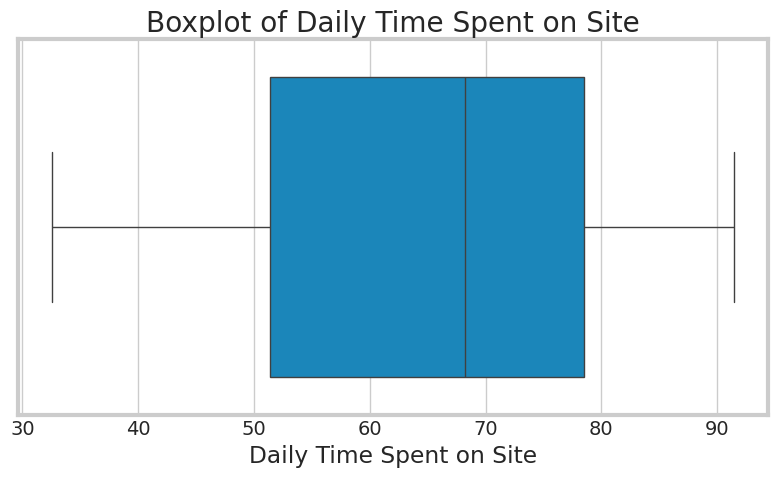

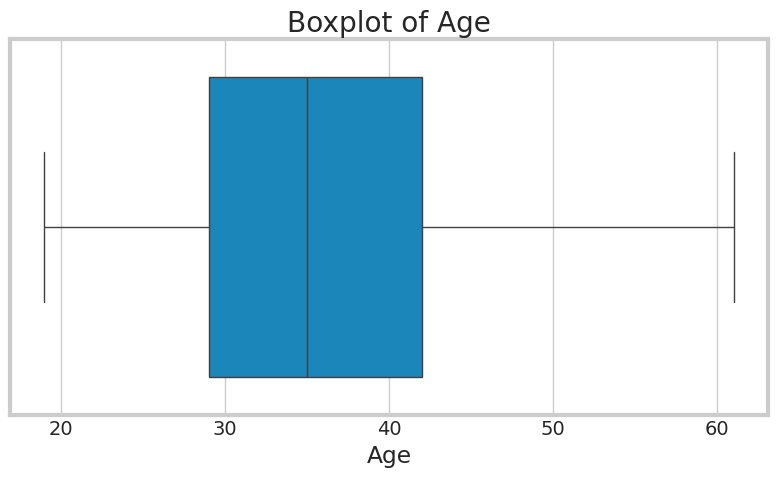

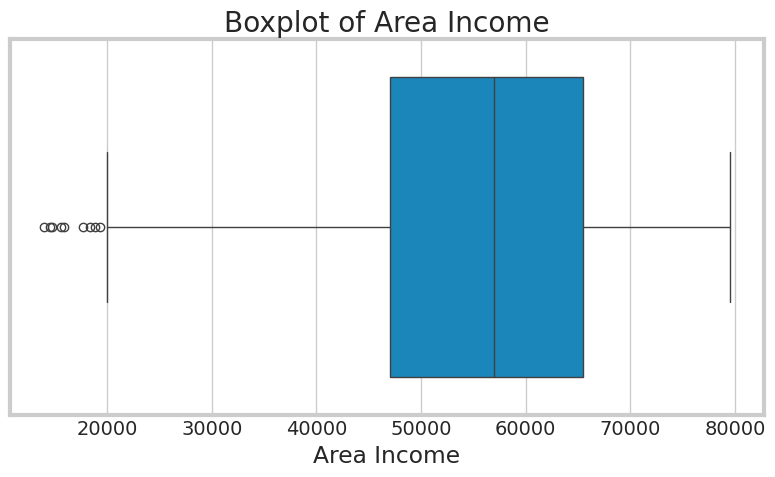

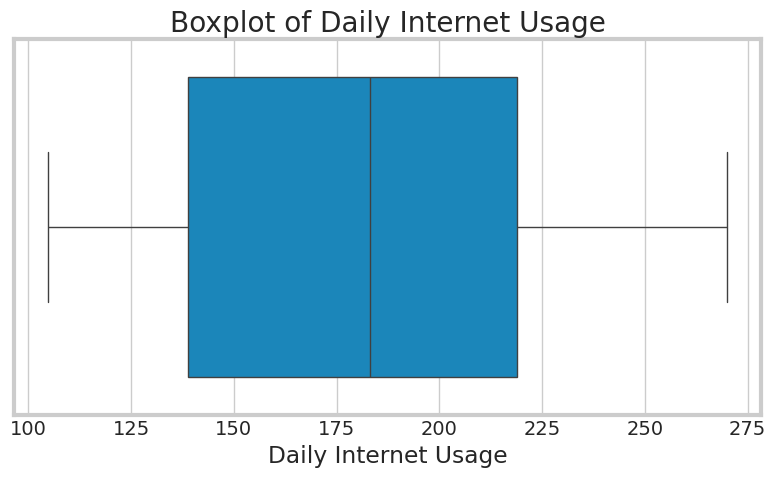

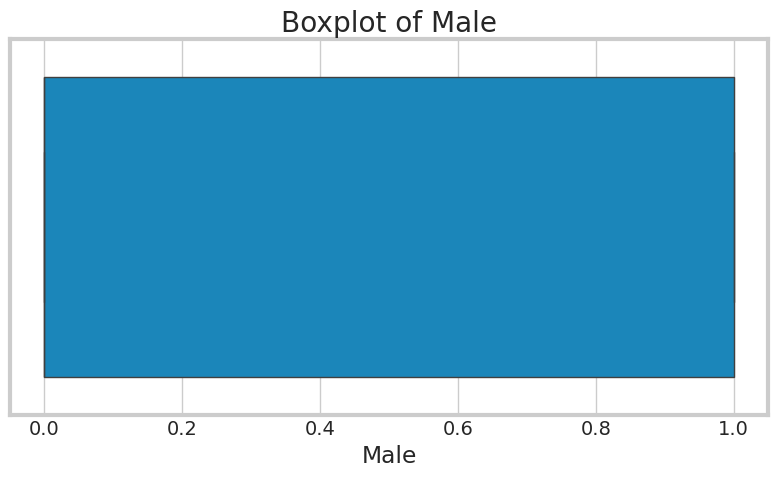

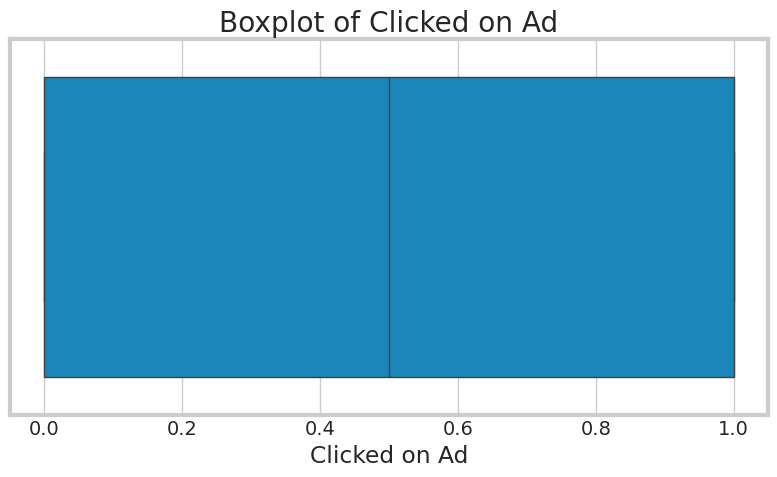

In [ ]:
column = data.columns
for i in column:
  plt.figure(figsize=(8,5))
  sns.boxplot(data=data, x=i)
  plt.title(f"Boxplot of {i}")
  plt.tight_layout()
  plt.show()

In [ ]:
Q1 = data['Area Income'].quantile(0.25)
Q3 = data['Area Income'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR

outlier_test = data[(data['Area Income'] < (Q1 - threshold)) | (data['Area Income'] > (Q3 + threshold))]['Area Income']
print("Outliers in the 'Area Income' column:")
outlier_test

Outliers in the 'Area Income' column:


,Area Income
135,17709.98
410,19345.36
510,18819.34
640,15598.29
665,15879.10
692,14548.06
768,13996.50
778,14775.50
952,18368.57


Based on the boxplot analysis, some outliers were detected, particularly in the Area Income column. However, these outliers were retained to preserve data integrity and class balance, especially since removing them would eliminate all instances of the Clicked on Ad = 0 class. Given that the selected modeling techniques are not highly sensitive to outliers, no outlier removal was performed at this stage.

##Feature Scaling with normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaling_column = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

data[scaling_column] = scaler.fit_transform(data[scaling_column])
data[scaling_column].describe().T[['min','max']]

,min,max
Daily Time Spent on Site,0.0,1.0
Age,0.0,1.0
Area Income,0.0,1.0
Daily Internet Usage,0.0,1.0


#📊 Clicked on Ad Predict (MACHINE LEARNING)
## Trying Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Separating features & dependent variable

In [ ]:
X = data.drop(['Clicked on Ad'], axis = 1)
y = data['Clicked on Ad']

##Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

###Training Model

In [ ]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)

In [ ]:
y_predict = logreg.predict(X_test)

##📈 Model Performance Evaluation

In [ ]:
print("Training Accuracy :", logreg.score(X_train, y_train))
print("Testing Accuracy :", logreg.score(X_test, y_test))

Training Accuracy : 0.97625
Testing Accuracy : 0.935


The model demonstrates very good performance on both the training and testing data, with only a small difference in accuracy. This indicates that there is no significant overfitting.

##Confusion matrix dan classification report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predict)
print(cm)

cr=classification_report(y_test, y_predict)
print(cr)

[[ 86   3]
 [ 10 101]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        89
           1       0.97      0.91      0.94       111

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



This classification model demonstrates satisfactory results with an accuracy above 93% and an F1-score greater than 0.9 for both classes. This performance indicates that the model generalizes well to previously unseen data.